# Imports

In [8]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [9]:
n = 6 # 5~9
label_name = "stat1" # update stat number
layers = [2] # mess with the layers (last layer should be the number of possibilities for this stat)

epochs = 2000 # increase if the loss is still decreasing by the end of training
train_split, test_split = 0.8, 0.2
learning_rate = 0.001 # don't change probably
momentum = 0.9 # don't change probably
batch_size = 64 # higher acc and longer runtime if smaller

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [10]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [11]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 6.0969038009643555
Epoch 1, Loss 6.019522309303284
Epoch 2, Loss 5.921316742897034
Epoch 3, Loss 5.810985743999481
Epoch 4, Loss 5.683822333812714
Epoch 5, Loss 5.5616424679756165
Epoch 6, Loss 5.456282913684845
Epoch 7, Loss 5.33426433801651
Epoch 8, Loss 5.2444369196891785
Epoch 9, Loss 5.1430100202560425
Epoch 10, Loss 5.026534020900726
Epoch 11, Loss 4.937584936618805
Epoch 12, Loss 4.8310598731040955
Epoch 13, Loss 4.747230559587479
Epoch 14, Loss 4.647339969873428
Epoch 15, Loss 4.562049925327301
Epoch 16, Loss 4.479193598031998
Epoch 17, Loss 4.392194986343384
Epoch 18, Loss 4.327133774757385
Epoch 19, Loss 4.244393676519394
Epoch 20, Loss 4.160128682851791
Epoch 21, Loss 4.090062320232391
Epoch 22, Loss 4.017106384038925
Epoch 23, Loss 3.948646694421768
Epoch 24, Loss 3.891454726457596
Epoch 25, Loss 3.812881737947464
Epoch 26, Loss 3.750540405511856
Epoch 27, Loss 3.6993755102157593
Epoch 28, Loss 3.624325305223465
Epoch 29, Loss 3.5622694194316864
Epoch 30, Loss

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

C:\Users\lewil\AppData\Local\Temp\ipykernel_4212\2152728193.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


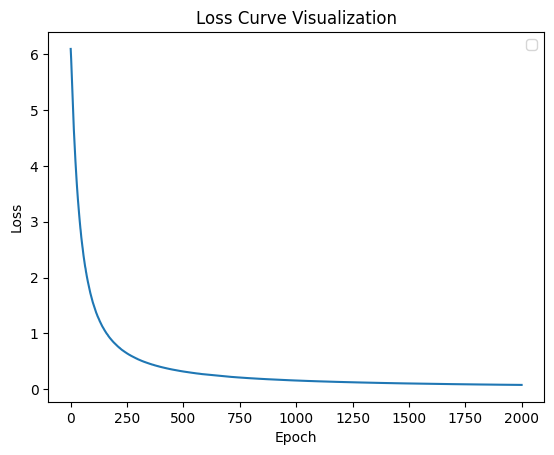

In [12]:
# plot loss vs epoch
plt.plot([i for i in range(epochs)], losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss Curve Visualization')
plt.legend()
plt.savefig(f'figures/loss_curve_{label_name}_{n}.png')

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[121, 0], [0, 23]]


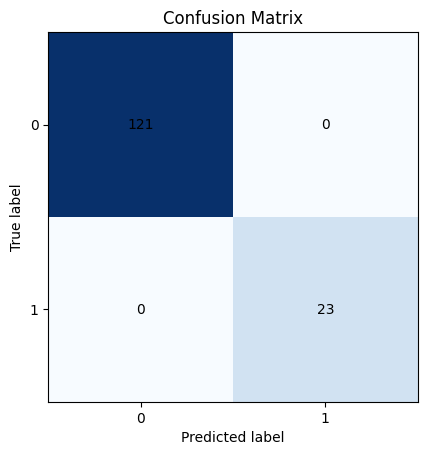

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


In [13]:
confusion_matrix = evaluate_model(model, test_dataset) # try training_dataset and test_dataset

print(confusion_matrix)
confusion_matrix.plot()
confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

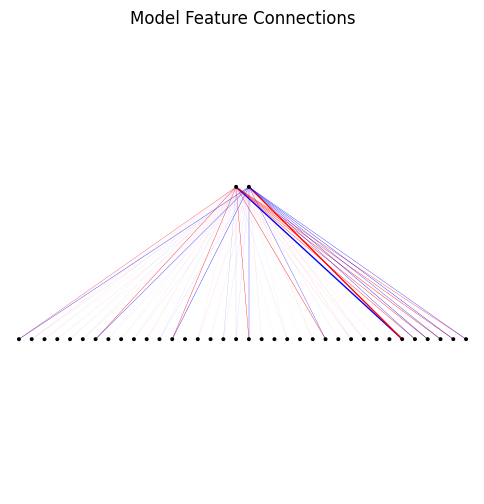

In [14]:
model.plot_connections()

#model.plot_heatmap_feature(1, 0)
#model.plot_heatmap_feature(1, 1)